In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [42]:
## Importation des donnees
data=pd.read_csv('avito_donnees.csv')

In [43]:
## transformer la colonne date en une colonne du type datetime
data['date']=data['date'].apply(lambda x: x[:10])

In [44]:
data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d')
data.dtypes

nom_produit            object
prix                  float64
categorie              object
ville                  object
date           datetime64[ns]
telephone              object
description            object
Nbr_vue                 int64
dtype: object

In [45]:
## Creation d'une colonne qui comporte le mois
data['mois'] = data['date'].dt.month_name()

In [46]:
data.head(3)

,nom_produit,prix,categorie,ville,date,telephone,description,Nbr_vue,mois
0,Villa semi-fini à vendre à Mehdia,NaN,"Maisons et Villas, Offre",Kénitra,2020-03-31,0638167055,"Salam à tous, soyez les bienvenues dans notre ...",20,March
1,Fanfaro TRD shpd,NaN,"Stocks et Vente en gros, Offre",Casablanca,2020-03-31,0661953633,Fanfaro TRD shpd 20L,374,March
2,visiteur chaise en bonne état à Aïn Sebaâ à Casab,NaN,"Matériels Professionnels, Offre",Casablanca,2020-03-31,0660423247,"Salut ,............... Salut à tous et bienve...",2,March


In [47]:
## Nombre total des annonces
data['nom_produit'].count()

504300

In [48]:
## 504 300 annonces en 83 jours 
data['date'].max()-data['date'].min()

Timedelta('83 days 00:00:00')

In [49]:
## Nombre d'annonces par ville
ville=data.groupby('ville')

In [50]:
v=ville['nom_produit'].count().sort_values(ascending=False)
v

ville
Casablanca        138351
Rabat              51323
Marrakech          44648
Tanger             30509
Agadir             25251
                   ...  
Ait Milk               1
Sidi Ali               1
Tifarouine             1
Ait Sidi Daoud         1
Bni Harchen            1
Name: nom_produit, Length: 574, dtype: int64

In [51]:
## Vous pouvez changer la variable ville pour savoir le nombre d'annonce dans une ville spécifique 
ville = 'Rabat'
v[ville]

51323

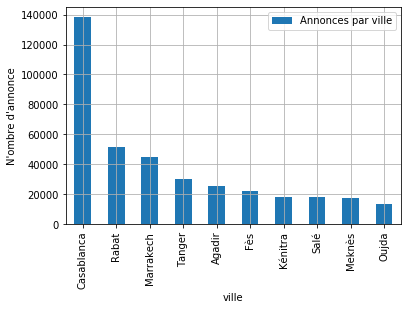

In [52]:
## Les 10 villes avec le plus d'annonces
v.sort_values(ascending=False).head(10).plot(kind='bar',label='Annonces par ville')
plt.ylabel("N'ombre d'annonce")
plt.grid()
plt.legend()
plt.show()

In [53]:
## Nombre d'annonces par catégorie
group=data.groupby('categorie')
cat=group['nom_produit'].count()
cat.sort_values(ascending=False)

categorie
Voitures, Offre                                                 70514
Téléphones, Offre                                               41025
Matériels Professionnels, Offre                                 34447
Meubles et Décoration, Offre                                    31736
Ordinateurs de bureau, Offre                                    31393
Ordinateurs portables, Offre                                    23503
Accessoires informatique et Gadgets, Offre                      19894
Appartements, Offre                                             18091
Motos, Offre                                                    17821
Pièces et Accessoires pour véhicules, Offre                     17247
Electroménager et Vaisselles, Offre                             15428
Appareils photo et Caméras, Offre                               15231
Appartements, Offre de location                                 14563
Terrains et Fermes, Offre                                       13500
Animaux, O

In [54]:
## vous pouvez changer la variable cate pour trouver le nombre d'annones d'une categorie specifique
cate='Voitures, Offre'
cat[cate]

70514

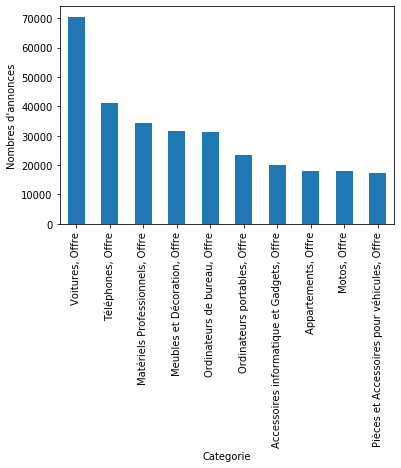

In [55]:
## Les 10 catégories avec le plus d'annonces
cat.sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Nombres d'annonces")
plt.xlabel("Categorie")
plt.show()

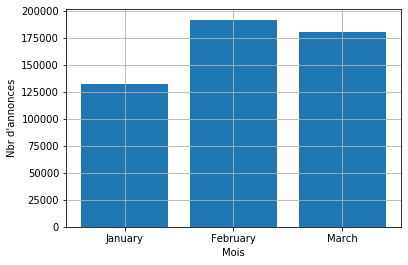

In [56]:
## Nombre d'annonce par mois
mois=data.groupby('mois')
Nbr=mois['nom_produit'].count()
plt.bar(['January','February','March'],[Nbr['January'],Nbr['February'],Nbr['March']])
plt.xlabel('Mois')
plt.ylabel("Nbr d'annonces")
plt.grid()
plt.show()

In [57]:
## nombre d'annonces en relation avec des maisons par ville
maison=data.loc[data['categorie'].isin(['Terrains et Fermes, Offre','Appartements, Offre de location','Appartements, Offre','Maisons et Villas, Offre'])]

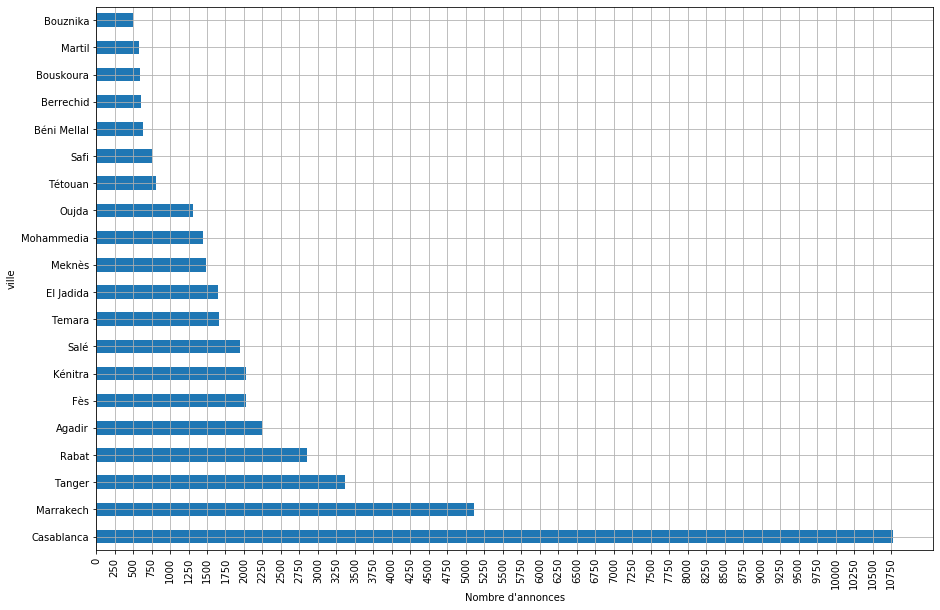

In [58]:
y=np.arange(0,11000,step=250)
plt.figure(figsize=(15,10))
maison.groupby('ville')['nom_produit'].count().sort_values(ascending=False).head(20).plot(kind='barh')
plt.xticks(y,rotation=90)
plt.xlabel("Nombre d'annonces")
plt.grid()
plt.show()


In [59]:
## nombre d'annonces en relation avec des voitures par ville
voiture=data.loc[data['categorie']=="Voitures, Offre"]

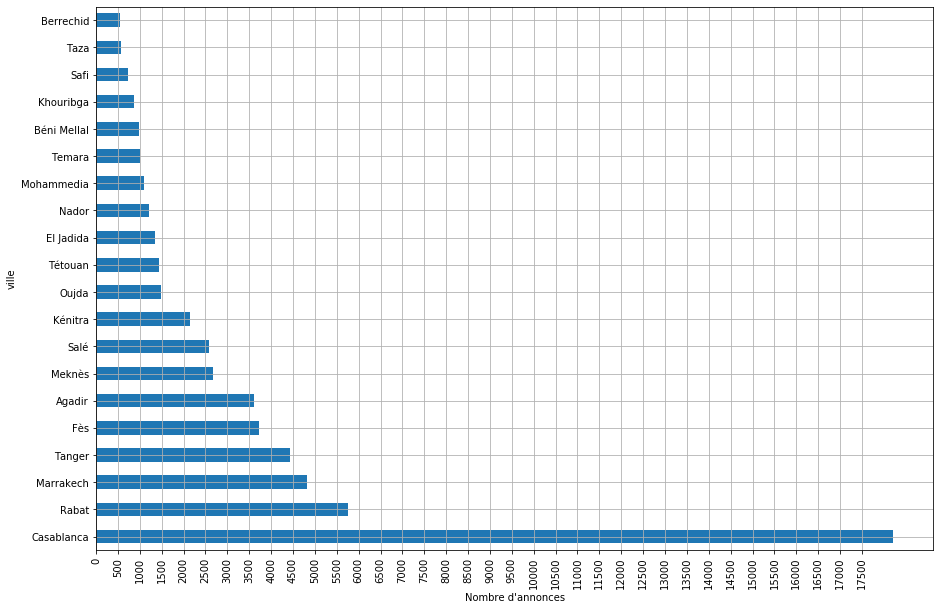

In [60]:
y=np.arange(0,18000,step=500)
plt.figure(figsize=(15,10))
voiture.groupby('ville')['nom_produit'].count().sort_values(ascending=False).head(20).plot(kind='barh')
plt.xticks(y,rotation=90)
plt.xlabel("Nombre d'annonces")
plt.grid()
plt.show()


In [61]:
## Effet du confinement sur Avito
df=data.copy()
df.set_index(df['date'],inplace=True)
a=df.resample('w').agg({'nom_produit':'count'})
[str(a.index[i])[:10] for i in range (len(a.index))]

['2020-01-12',
 '2020-01-19',
 '2020-01-26',
 '2020-02-02',
 '2020-02-09',
 '2020-02-16',
 '2020-02-23',
 '2020-03-01',
 '2020-03-08',
 '2020-03-15',
 '2020-03-22',
 '2020-03-29',
 '2020-04-05']

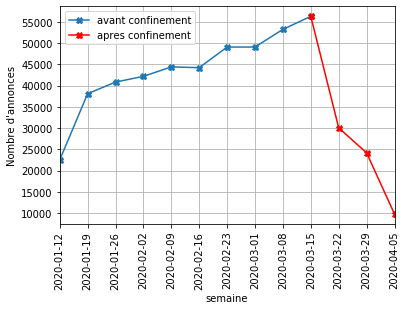

In [62]:
## Effet du confinement sur Avito
data['semaine']=data['date'].dt.week
semaine=data.groupby('semaine')
semaine['nom_produit'].count().loc[:11].plot(kind='line',label='avant confinement',marker='X')
semaine['nom_produit'].count().loc[11:].plot(kind='line',c='r',label='apres confinement',marker='X')
plt.grid()
plt.ylabel("Nombre d'annonces")
plt.xticks(np.arange(2,15,1),rotation=90,labels=[str(a.index[i])[:10] for i in range (len(a.index))])
plt.yticks(np.arange(10000,60000,5000))
plt.legend(loc='best')
plt.show()
## On remarque une baisse significative dans le nombre d'annonce aprés le confinement


In [63]:
## les categories les plus vues
cat=data.groupby('categorie')
cat['Nbr_vue'].sum().sort_values(ascending=False)

categorie
Voitures, Offre                                                 72487565
Appartements, Offre de location                                 13031198
Appartements, Offre                                             12928605
Motos, Offre                                                     7126694
Maisons et Villas, Offre                                         6502950
Meubles et Décoration, Offre                                     6231470
Téléphones, Offre                                                6121927
Terrains et Fermes, Offre                                        5321005
Matériels Professionnels, Offre                                  3722921
Camions, Offre                                                   3348651
Locations de vacances, Offre de location                         2771779
Pièces et Accessoires pour véhicules, Offre                      2750943
Animaux, Offre                                                   2693281
Ordinateurs portables, Offre             

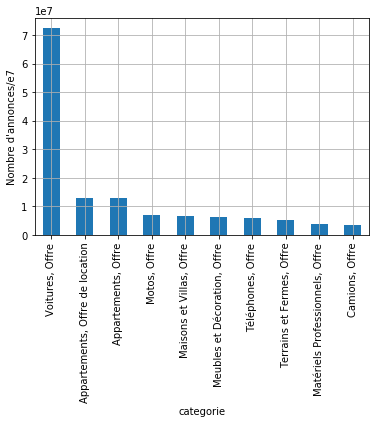

In [64]:
## les 10 categories les plus vues
cat['Nbr_vue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("categorie")
plt.ylabel("Nombre d'annonces/e7")
plt.grid()
plt.show()

In [65]:
## les villes des annonces les plus consultés
data.groupby('ville').sum()['Nbr_vue'].sort_values(ascending=False)

ville
Casablanca       51754580
Rabat            15367585
Marrakech        15196821
Tanger           10808476
Agadir            8665022
                   ...   
Sidi El Mekki          22
Ait Ichou              22
Jaadar                 21
Azlaf                  21
Sabbah                 11
Name: Nbr_vue, Length: 574, dtype: int64

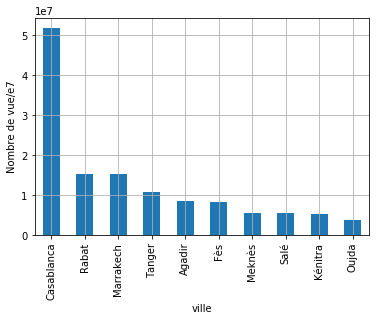

In [66]:
data.groupby('ville').sum()['Nbr_vue'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Nombre de vue/e7")
plt.grid()
plt.show()

In [67]:
## Annonces avec valeur manquantes
data.isna().sum()/data.shape[0]
## 24% d'annonces n'ont pas la valeur du prix
## 6% d'annonces n'ont pas de description

nom_produit    0.000000
prix           0.243962
categorie      0.000000
ville          0.000000
date           0.000000
telephone      0.000000
description    0.065090
Nbr_vue        0.000000
mois           0.000000
semaine        0.000000
dtype: float64

In [68]:
## les catégories avec le plus d'annonces selon les villes
a=data.groupby(['ville','categorie'])

In [69]:
b=a['nom_produit'].count().sort_values(ascending=False)
b=b.reset_index()
b.rename(columns={'nom_produit':'nombre_produit'},inplace=True)
b

,ville,categorie,nombre_produit
0,Casablanca,"Voitures, Offre",18215
1,Casablanca,"Matériels Professionnels, Offre",13247
2,Casablanca,"Téléphones, Offre",12543
3,Casablanca,"Meubles et Décoration, Offre",8587
4,Casablanca,"Accessoires informatique et Gadgets, Offre",6375
...,...,...,...
7194,Méchouar Fès Jdid,"Appareils photo et Caméras, Offre",1
7195,Chefchaouen,"Instruments de Musique, Offre",1
7196,Chefchaouen,"Films, Livres, Magazines, Offre",1
7197,Méchouar Fès Jdid,"Films, Livres, Magazines, Offre",1


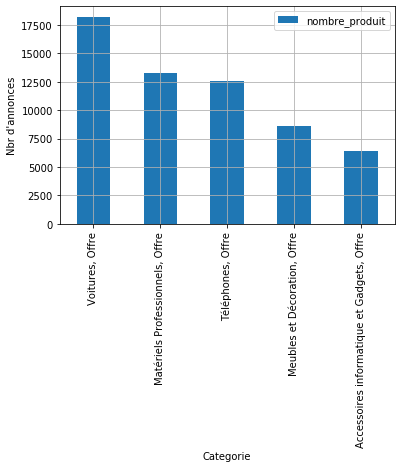

In [70]:
## vous pouvez changer la variable v pour voir d'autre ville.
v='Casablanca'
e=b.loc[b['ville']==v,['categorie','nombre_produit']].head(5)
e.plot(kind='bar')
plt.xlabel('Categorie')
plt.ylabel("Nbr d'annonces")
plt.xticks(np.arange(5),labels=list(e['categorie'].values),rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()



In [71]:
## Les 10 annonces les plus vues
data.sort_values(by='Nbr_vue',ascending=False).head(10)

,nom_produit,prix,categorie,ville,date,telephone,description,Nbr_vue,mois,semaine
1282,Appartement 96 m2 à Bouskoura,864000.0,"Appartements, Offre",Bouskoura,2020-03-31,0522212021,Vendons des appartements Moyenne standing dan...,82329,March,14
136345,Appartement de 90 m2 au centre Marrakech,250.0,"Locations de vacances, Offre de location",Marrakech,2020-03-06,0668122530,"je suis un particulier, je mets en location me...",69361,March,10
5768,Appartement 2 chambres salon 2 salle de bains,250000.0,"Appartements, Offre",Bouskoura,2020-03-30,0522212021,"Ne rater pas, notre projet économique situé da...",58173,March,14
1938,Velar R dinamique -2018,580000.0,"Voitures, Offre",Casablanca,2020-03-31,0661664461,Voiture trai bon état toute option diesel full...,57748,March,14
192956,Appartement Moyen Standing à Lissasfa,400000.0,"Appartements, Offre",Casablanca,2020-02-28,0620690088,"Situé à Casablanca, à 5 minutes du quartier Li...",46229,February,9
151778,ديور سفلية مع إمكانية إمكانية إضافة طبقين,250000.0,"Appartements, Offre",Salé,2020-03-04,0602686026,ديار البساتين مشروع سكني اجتماعي يقع في المدين...,41093,March,10
77607,Fiat FREEMONT Diesel automatique -2012,NaN,"Voitures, Offre",Casablanca,2020-03-13,0689515517,NaN,35540,March,11
705,Mercedes-Benz Classe C220 Coupe Diesel -2016,340000.0,"Voitures, Offre",Rabat,2020-03-31,0631070707,Kifal auto auto est la startup qui transforme ...,32384,March,14
484758,شقة ممتازة للكراء بحي الشرف قرب مرجان,2700.0,"Appartements, Offre de location",Marrakech,2020-01-12,0694114550,شقة ممتازة للكراء بحي الشرف قرب مرجان صالون غر...,31825,January,2
2710,Marguerites 2 Appartement Haut standing Gueliz,947000.0,"Appartements, Offre",Marrakech,2020-03-30,0600031834,Vous êtes à la recherche d’un appartement de s...,31074,March,14


In [72]:
## Nombre de visites par semaine
df=data.copy()
df.set_index('date',inplace=True)
a=df.resample('w').agg({'Nbr_vue':sum})
a


,Nbr_vue
date,
2020-01-12,8685724
2020-01-19,13515259
2020-01-26,12508457
2020-02-02,12898283
2020-02-09,14181286
2020-02-16,13797149
2020-02-23,14319793
2020-03-01,14325672
2020-03-08,15376932


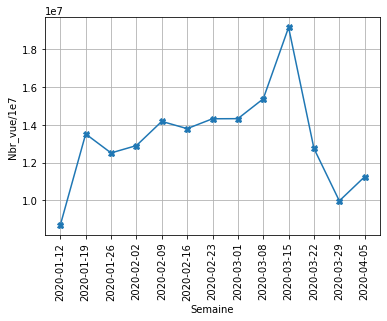

In [73]:

plt.plot(a.index,a['Nbr_vue'],marker='X')
plt.xticks(a.index,rotation=90)
plt.grid()
plt.xlabel('Semaine')
plt.ylabel('Nbr_vue/1e7')
plt.show()

In [74]:
## comparaison des nombre de vue par ville
v=df.groupby('ville')
a=v.resample('w').agg({'Nbr_vue':'sum'})
a

Nbr_vue
ville               date               
Aarab Sebbah Gheris 2020-01-12     2644
                    2020-01-19     5308
                    2020-01-26     3302
                    2020-02-02     5616
                    2020-02-09     2960
...                                 ...
Zoumi               2020-02-23        0
                    2020-03-01      333
                    2020-03-08       33
                    2020-03-15        0
                    2020-03-22      453

[4951 rows x 1 columns]

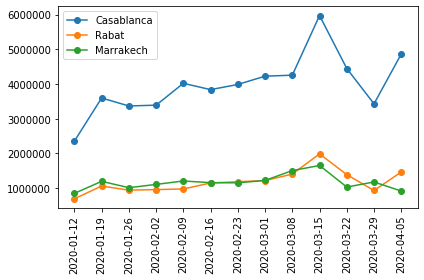

In [75]:
## Pour comparer entre d'autres villes changer la variable ville
ville=['Casablanca','Rabat','Marrakech']
b=a.loc[ville].reset_index()
for i in ville:
    c=b.loc[(b['ville']==i),['date','Nbr_vue']]
    plt.plot_date(c['date'],c['Nbr_vue'],label=i,linestyle='solid')
    plt.xticks(c['date'],rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [76]:
## les categories d'annonces les plus chers
cat=data.groupby('categorie')
prix=cat['prix'].median().sort_values(ascending=False)
prix

categorie
Maisons et Villas, Offre                                        1300000.0
Appartements, Offre                                              550000.0
Terrains et Fermes, Offre                                        470000.0
Magasins, Commerces et Locaux industriels, Offre                 400000.0
Bureaux et Plateaux, Offre                                       350000.0
Engins BTP, Offre                                                140000.0
Camions, Offre                                                   100000.0
Autres, Offre                                                    100000.0
Engins Agricole, Offre                                            74000.0
Voitures, Offre                                                   66000.0
Bateaux, Offre                                                    34000.0
Remorques et Caravanes, Offre                                     13000.0
Terrains et Fermes, Offre de location                             11950.0
Motos, Offre                

In [77]:
## vous pouvez changer la variable cate pour trouver le median du prix d'une categorie specifique
cate='Voitures, Offre'
prix[cate]

66000.0

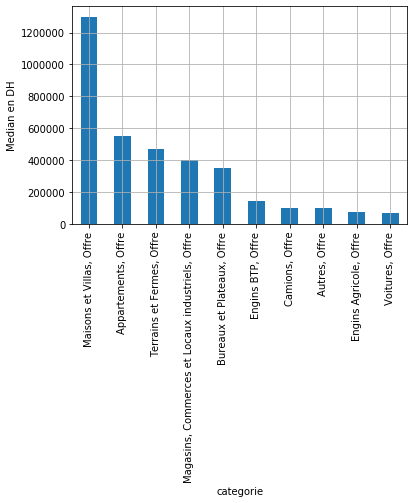

In [79]:
## les 10 categories où les annonces sont les plus chers
prix.head(10).plot(kind='bar')
plt.ylabel('Median en DH')
plt.grid()
plt.show()

In [ ]:
##Ce projet a été fait par Taha Tamir et Ayoub Alalou